In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [98]:
df = pd.read_csv('E:/HDD Documents/HDD Documents/School/WGU/d208_predictive_modeling/medical/medical_clean.csv')

In [99]:
df.drop(['Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8', 'City','State','County','Zip','Lat','Lng','Population','TimeZone', 'Additional_charges','TotalCharge','Services','Interaction',
'UID', 'Customer_id','Job','Income', 'Marital', 'CaseOrder', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink','Initial_admin', 'Initial_days', 'Area','Children'],axis = 1, inplace = True)

In [100]:
df = df[['ReAdmis', 'Age', 'Gender', 'VitD_levels', 'HighBlood', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']]

In [101]:
df.isna().any()

ReAdmis               False
Age                   False
Gender                False
VitD_levels           False
HighBlood             False
Stroke                False
Complication_risk     False
Overweight            False
Arthritis             False
Diabetes              False
Hyperlipidemia        False
BackPain              False
Anxiety               False
Allergic_rhinitis     False
Reflux_esophagitis    False
Asthma                False
dtype: bool

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ReAdmis             10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   VitD_levels         10000 non-null  float64
 4   HighBlood           10000 non-null  object 
 5   Stroke              10000 non-null  object 
 6   Complication_risk   10000 non-null  object 
 7   Overweight          10000 non-null  object 
 8   Arthritis           10000 non-null  object 
 9   Diabetes            10000 non-null  object 
 10  Hyperlipidemia      10000 non-null  object 
 11  BackPain            10000 non-null  object 
 12  Anxiety             10000 non-null  object 
 13  Allergic_rhinitis   10000 non-null  object 
 14  Reflux_esophagitis  10000 non-null  object 
 15  Asthma              10000 non-null  object 
dtypes: fl

In [103]:
CategoricalData = df.select_dtypes(include = "object").columns
print(CategoricalData)

Index(['ReAdmis', 'Gender', 'HighBlood', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma'],
      dtype='object')


In [104]:
NumericalData = df.select_dtypes(include = "number").columns
print (NumericalData)

Index(['Age', 'VitD_levels'], dtype='object')


No     6331
Yes    3669
Name: ReAdmis, dtype: int64


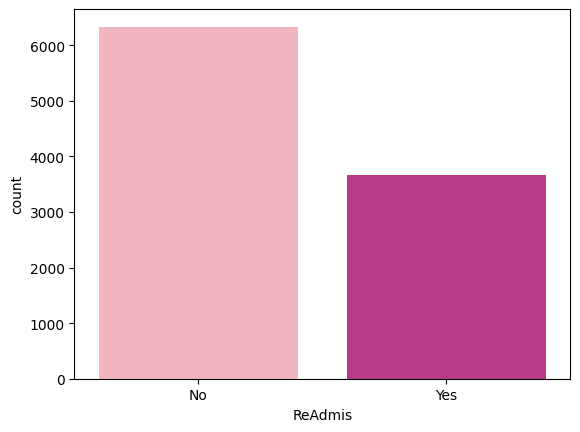

In [105]:
print(df['ReAdmis'].value_counts())
sns.countplot(x = 'ReAdmis', data = df, palette = 'RdPu')
plt.show()

array([[<AxesSubplot: title={'center': 'VitD_levels'}>]], dtype=object)

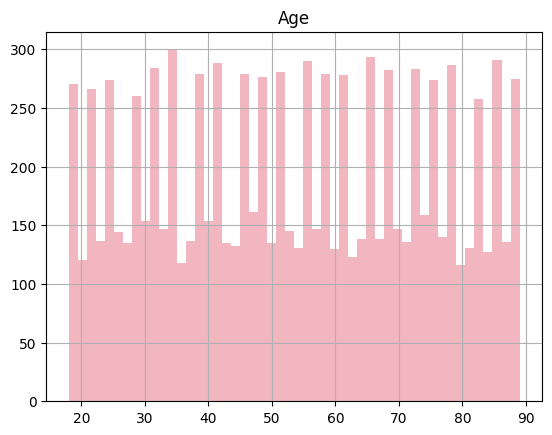

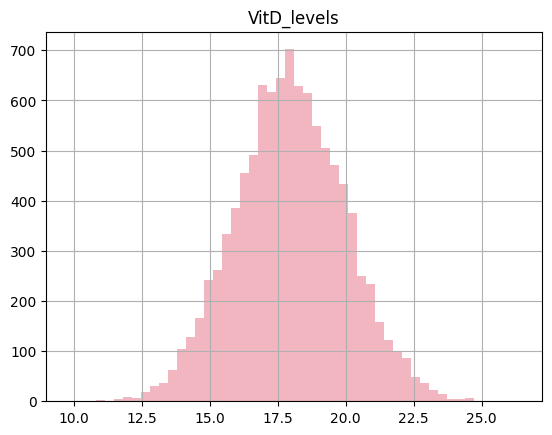

In [106]:
df.hist('Age', bins = 50, color = '#f1b6bf')
df.hist('VitD_levels', bins = 50, color = '#f1b6bf')

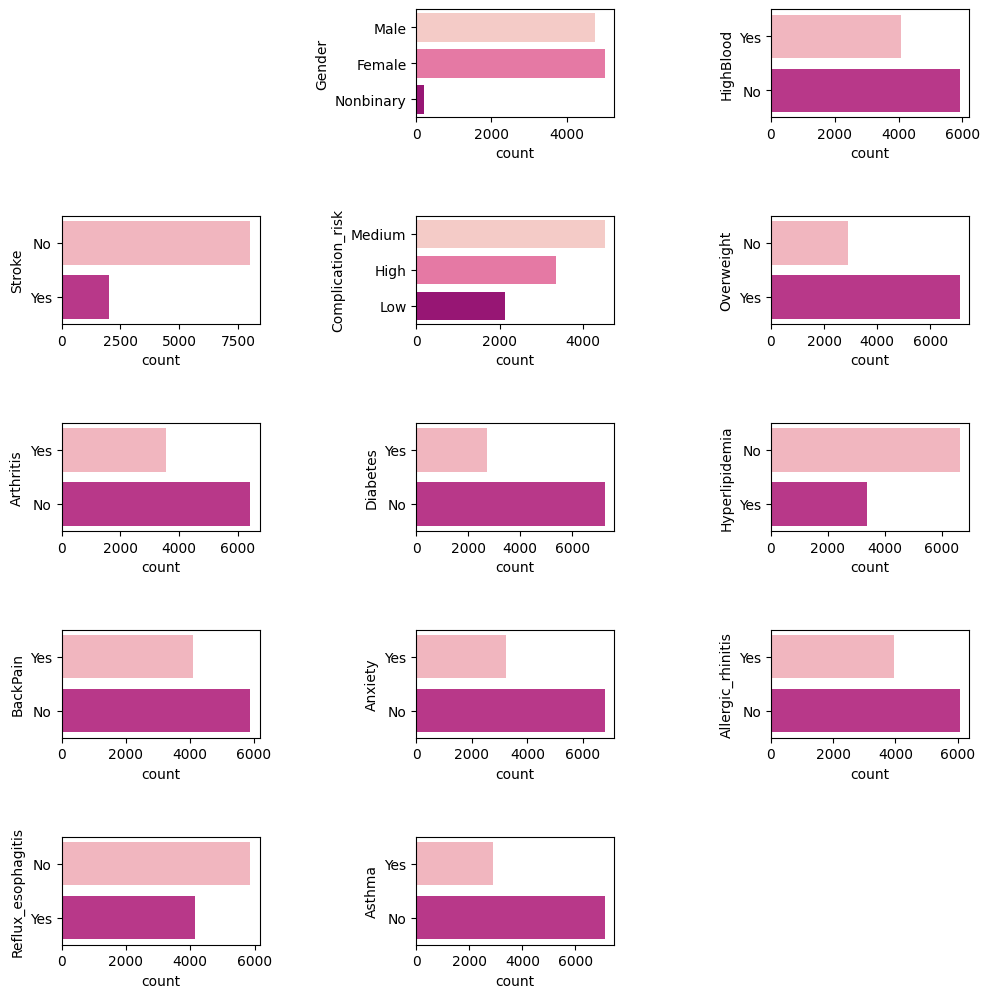

In [107]:
fig = plt.figure(figsize = (10, 20))
for i, col in enumerate(CategoricalData):
    if col != 'ReAdmis':
        plt.subplot(10, 3, i + 1)
        ax = sns.countplot(y = col, data = df, palette = 'RdPu')
        fig.tight_layout(h_pad = 4, w_pad = 4)
plt.show()

<AxesSubplot: xlabel='Asthma'>

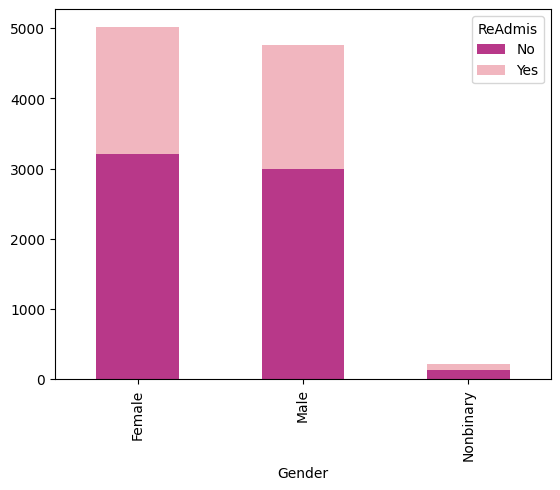

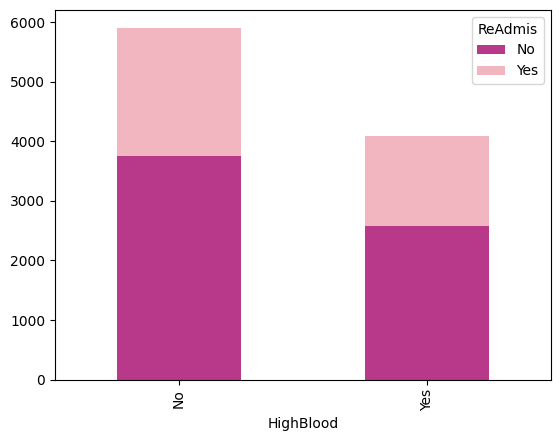

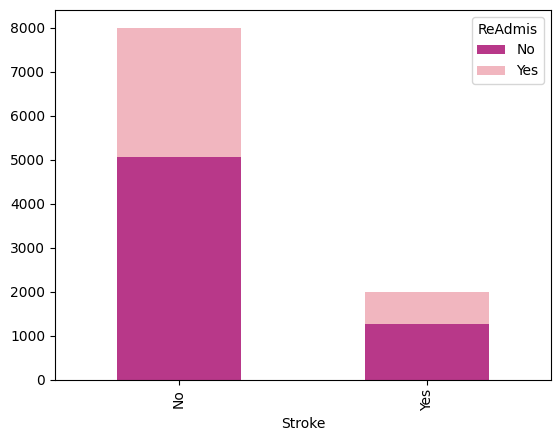

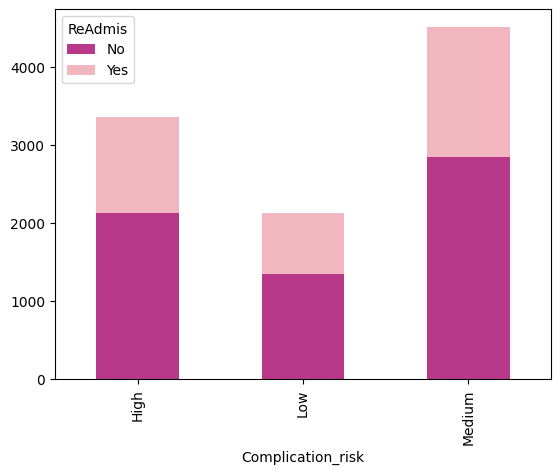

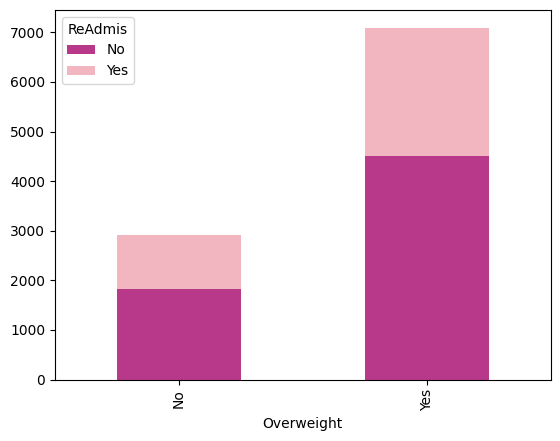

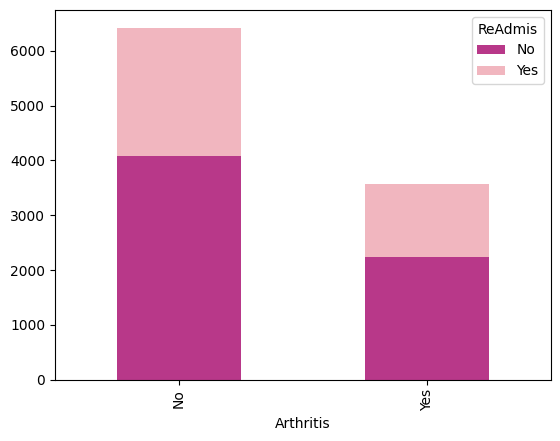

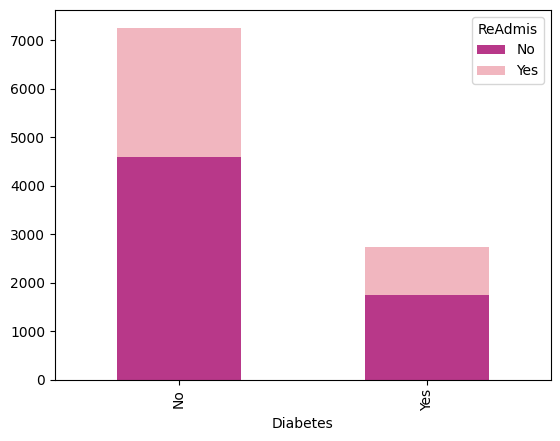

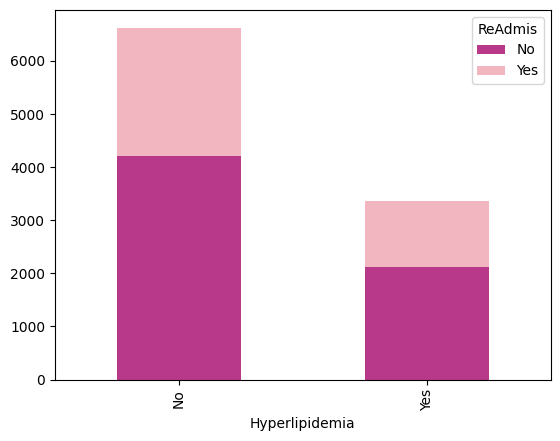

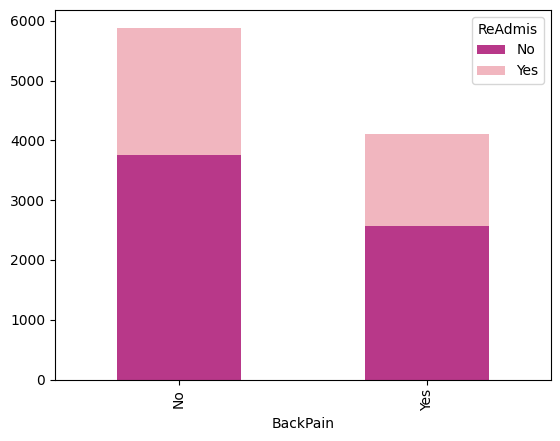

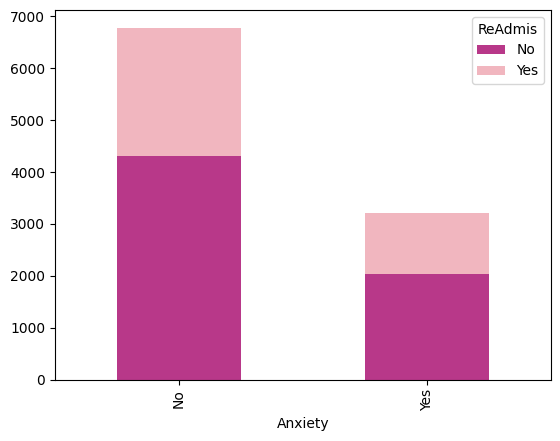

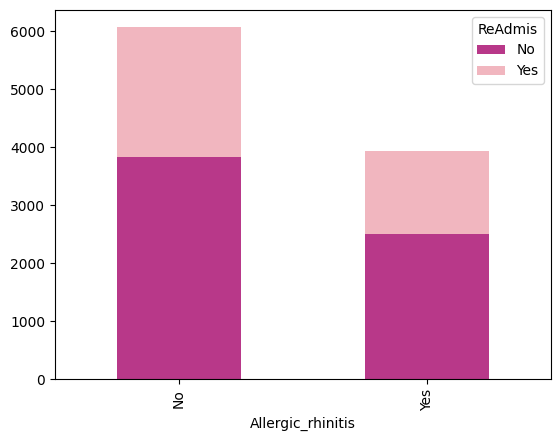

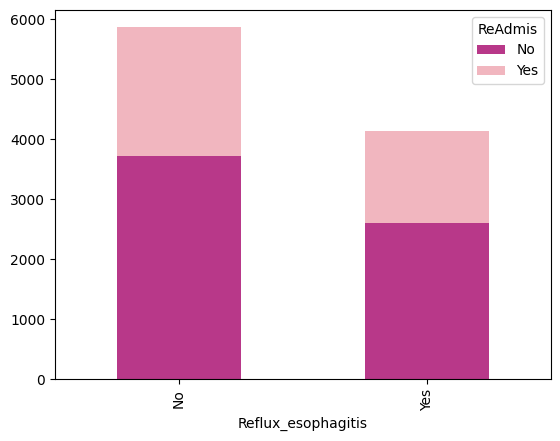

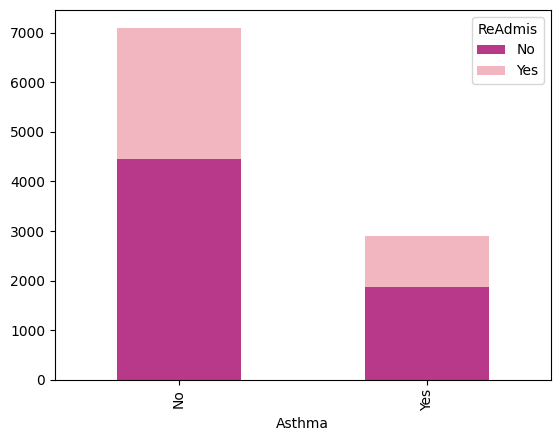

In [108]:
tbl = pd.pivot_table(df.groupby(['Gender','ReAdmis']).size().reset_index(), values = 0, index = 'Gender', columns = ['ReAdmis'], aggfunc = np.sum)
tbl.plot(kind = 'bar',stacked = True, color = ['#b83889', '#f1b6bf'])

tbl = pd.pivot_table(df.groupby(['HighBlood','ReAdmis']).size().reset_index(), values = 0, index = 'HighBlood', columns = ['ReAdmis'], aggfunc = np.sum)
tbl.plot(kind = 'bar',stacked = True, color = ['#b83889', '#f1b6bf'])

tbl = pd.pivot_table(df.groupby(['Stroke','ReAdmis']).size().reset_index(), values = 0, index = 'Stroke', columns = ['ReAdmis'], aggfunc = np.sum)
tbl.plot(kind = 'bar',stacked = True, color = ['#b83889', '#f1b6bf'])

tbl = pd.pivot_table(df.groupby(['Complication_risk','ReAdmis']).size().reset_index(), values = 0, index = 'Complication_risk', columns = ['ReAdmis'], aggfunc = np.sum)
tbl.plot(kind = 'bar',stacked = True, color = ['#b83889', '#f1b6bf'])

tbl = pd.pivot_table(df.groupby(['Overweight','ReAdmis']).size().reset_index(), values = 0, index = 'Overweight', columns = ['ReAdmis'], aggfunc = np.sum)
tbl.plot(kind = 'bar',stacked = True, color = ['#b83889', '#f1b6bf'])

tbl = pd.pivot_table(df.groupby(['Arthritis','ReAdmis']).size().reset_index(), values = 0, index = 'Arthritis', columns = ['ReAdmis'], aggfunc = np.sum)
tbl.plot(kind = 'bar',stacked = True, color = ['#b83889', '#f1b6bf'])

tbl = pd.pivot_table(df.groupby(['Diabetes','ReAdmis']).size().reset_index(), values = 0, index = 'Diabetes', columns = ['ReAdmis'], aggfunc = np.sum)
tbl.plot(kind = 'bar',stacked = True, color = ['#b83889', '#f1b6bf'])

tbl = pd.pivot_table(df.groupby(['Hyperlipidemia','ReAdmis']).size().reset_index(), values = 0, index = 'Hyperlipidemia', columns = ['ReAdmis'], aggfunc = np.sum)
tbl.plot(kind = 'bar',stacked = True, color = ['#b83889', '#f1b6bf'])

tbl = pd.pivot_table(df.groupby(['BackPain','ReAdmis']).size().reset_index(), values = 0, index = 'BackPain', columns = ['ReAdmis'], aggfunc = np.sum)
tbl.plot(kind = 'bar',stacked = True, color = ['#b83889', '#f1b6bf'])

tbl = pd.pivot_table(df.groupby(['Anxiety','ReAdmis']).size().reset_index(), values = 0, index = 'Anxiety', columns = ['ReAdmis'], aggfunc = np.sum)
tbl.plot(kind = 'bar',stacked = True, color = ['#b83889', '#f1b6bf'])

tbl = pd.pivot_table(df.groupby(['Allergic_rhinitis','ReAdmis']).size().reset_index(), values = 0, index = 'Allergic_rhinitis', columns = ['ReAdmis'], aggfunc = np.sum)
tbl.plot(kind = 'bar',stacked = True, color = ['#b83889', '#f1b6bf'])

tbl = pd.pivot_table(df.groupby(['Reflux_esophagitis','ReAdmis']).size().reset_index(), values = 0, index = 'Reflux_esophagitis', columns = ['ReAdmis'], aggfunc = np.sum)
tbl.plot(kind = 'bar',stacked = True, color = ['#b83889', '#f1b6bf'])

tbl = pd.pivot_table(df.groupby(['Asthma','ReAdmis']).size().reset_index(), values = 0, index = 'Asthma', columns = ['ReAdmis'], aggfunc = np.sum)
tbl.plot(kind = 'bar',stacked = True, color = ['#b83889', '#f1b6bf'])

In [109]:
df = df.replace(to_replace = ['Yes', 'No'], value = [1, 0])
df['ReAdmis'] = df['ReAdmis'].replace(['Yes', 'No'] , [1, 2])
df['Gender'] = df['Gender'].replace(['Nonbinary', 'Male', 'Female'] , [0, 1, 2])
df['Complication_risk'] = df['Complication_risk'].replace(['Low', 'Medium', 'High'] , [0, 1, 2])

<AxesSubplot: xlabel='ReAdmis', ylabel='Age'>

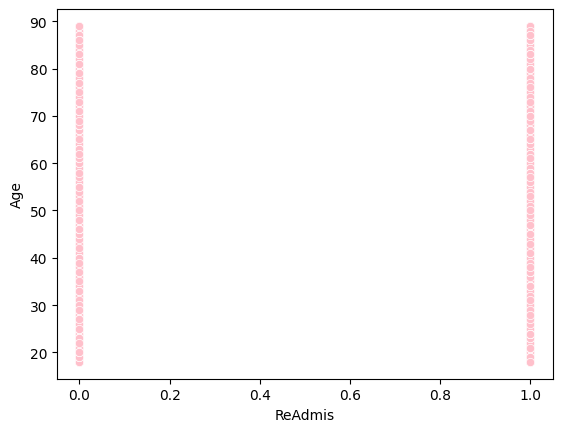

In [110]:
sns.scatterplot(x = df['ReAdmis'], y = df['Age'], color ='pink')

<AxesSubplot: xlabel='ReAdmis', ylabel='VitD_levels'>

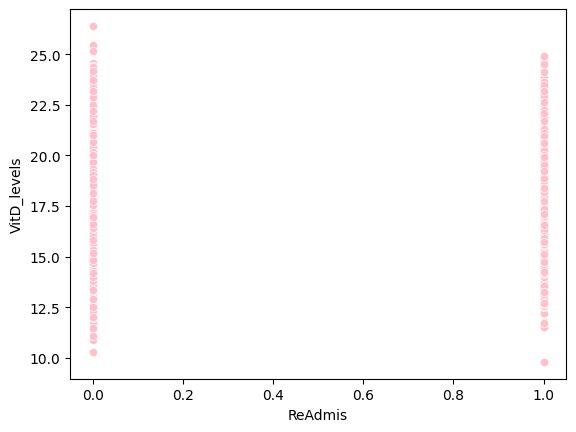

In [111]:
sns.scatterplot(x = df['ReAdmis'], y = df['VitD_levels'], color ='pink')

In [112]:
df.drop(['Gender', 'Complication_risk', 'Age', 'VitD_levels'], axis = 1)

,ReAdmis,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma
0,0,1,0,0,1,1,0,1,1,1,0,1
1,0,1,0,1,0,0,0,0,0,0,1,0
2,0,1,0,1,0,1,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,1,1
4,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,0,0,0,0,0,0,1,0,1,0
9996,1,1,0,1,1,1,0,0,0,0,0,1
9997,1,1,0,1,0,0,0,0,1,1,0,0
9998,1,0,0,1,0,0,0,1,0,0,0,0


In [113]:
df.to_csv('E:/HDD Documents/HDD Documents/School/WGU/d209_data_mining_i/medical_clean209_task1_b1.csv')

In [114]:
X = df.drop('ReAdmis', axis = 1 ).values
y = df['ReAdmis'].values

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 22)

In [116]:
X_train.tofile('E:/HDD Documents/HDD Documents/School/WGU/d209_data_mining_i/medical_clean209_task1_xtrain.csv')
X_test.tofile('E:/HDD Documents/HDD Documents/School/WGU/d209_data_mining_i/medical_clean209_task1_xtest.csv')
y_train.tofile('E:/HDD Documents/HDD Documents/School/WGU/d209_data_mining_i/medical_clean209_task1_ytrain.csv')
y_test.tofile('E:/HDD Documents/HDD Documents/School/WGU/d209_data_mining_i/medical_clean209_task1_ytest.csv')

In [117]:
knn = KNeighborsClassifier(n_neighbors = 14)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [118]:
accuracy_score(y_test, y_pred)

0.6046666666666667

In [119]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.64      0.89      0.74      1920\n           1       0.33      0.09      0.14      1080\n\n    accuracy                           0.60      3000\n   macro avg       0.48      0.49      0.44      3000\nweighted avg       0.52      0.60      0.53      3000\n'

In [120]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[1714  206]
 [ 980  100]]


<AxesSubplot: >

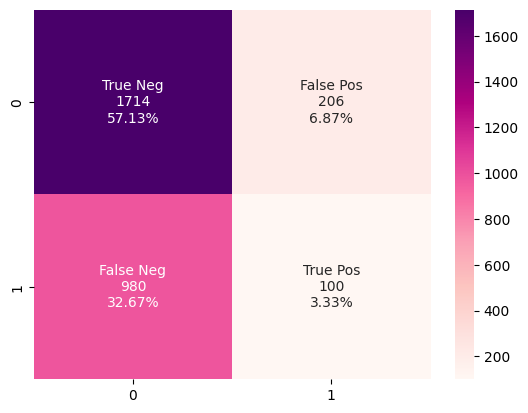

In [121]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in
zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cf_matrix, annot = labels,fmt = '', cmap = 'RdPu')

In [122]:
pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [123]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size = 0.3, random_state = 22)

In [124]:
pipe.fit(X_train_scaled, y_train_scaled)


Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [125]:
y_pred_scaled = pipe.predict(X_test_scaled)

In [126]:
accuracy_score(y_test_scaled, y_pred_scaled)

0.5723333333333334

In [127]:
classification_report(y_test_scaled, y_pred_scaled)

'              precision    recall  f1-score   support\n\n           0       0.64      0.74      0.69      1920\n           1       0.37      0.28      0.32      1080\n\n    accuracy                           0.57      3000\n   macro avg       0.51      0.51      0.50      3000\nweighted avg       0.55      0.57      0.56      3000\n'

In [128]:
scaled_matrix = confusion_matrix(y_test_scaled, y_pred_scaled)
print(cf_matrix)

[[1714  206]
 [ 980  100]]


<AxesSubplot: >

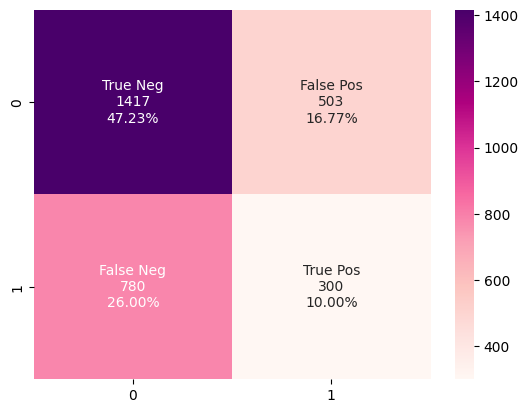

In [129]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in scaled_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in scaled_matrix.flatten()/np.sum(scaled_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in
zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(scaled_matrix, annot = labels,fmt = '', cmap = 'RdPu')

In [130]:
param_grid = {'n_neighbors': np.arange(1, 50)}

In [131]:
knn_cv = GridSearchCV(knn, param_grid, cv = 5)

In [132]:
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=14),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [133]:
knn_cv.best_params_

{'n_neighbors': 48}

In [134]:
knn_cv.best_score_

0.6235714285714286

In [135]:
knn_cv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=14),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [136]:
y_pred_prob = knn_cv.predict_proba(X_test)[:, 1]

In [137]:
roc_auc_score(y_test, y_pred_prob)

0.5849537037037037

In [138]:
cv_auc = cross_val_score(knn_cv, X, y, cv = 5,scoring = 'roc_auc')
cv_auc

array([0.50233711, 0.48902818, 0.49008549, 0.49382455, 0.50025989])